# Powergrid library construction and zero gamma data

$\Gamma = 0$,

Perburbations = large

Splitting time-series according to perturbation points

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import coo_array

from os import path

## Loading data

#### Reading gamma values 

In [2]:
folder_name = "powergrid/Datasets/case4bus2gen/"

In [3]:
gamma_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_gamma.csv"))

In [4]:
gamma_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000


#### Reading time series data and skipping rows to sub sample

In [5]:
# #Trimming original time series to reduce the number of data points
# data_matrix_df_orig = pd.read_csv(path.join(folder_name, "case_4bus2gen_timeseries.csv"))
# skip_n_rows_btw = 100
# rows_to_keep = np.arange(0, len(data_matrix_df_orig), skip_n_rows_btw)

# data_matrix_df = data_matrix_df_orig.iloc[rows_to_keep].reset_index(drop=True)

# data_matrix_df.to_csv(path.join(folder_name, "trimmed_time_series.csv"), index=False)

In [6]:
data_matrix_df = pd.read_csv(path.join(folder_name, "trimmed_time_series.csv"))

In [7]:
data_matrix_df

,time,PhaseGen1,PhaseGen2,PhaseGenTerm1,PhaseGenTerm2,PhaseLoad1,PhaseLoad2,FreqGen1,FreqGen2,FreqGenTerm1,...,ActivePowerGenTerm1,ActivePowerGenTerm2,ActivePowerLoad1,ActivePowerLoad2,ReactivePowerGen1,ReactivePowerGen2,ReactivePowerGenTerm1,ReactivePowerGenTerm2,ReactivePowerLoad1,ReactivePowerLoad2
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,...,-0.00000000,1.30553432,-0.82715001,-0.47838430,0.00000000,0.00000000,0.68226515,1.40126166,-1.07708835,-1.28431796
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,...,0.25887909,-0.09266137,-0.97515765,-1.22561386,0.01685263,0.05413882,0.70721622,1.45846000,-1.07791568,-1.27233265
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,...,0.00431959,-0.27718714,-1.30142939,-1.56906862,0.05116939,0.11723936,0.74514915,1.54140061,-1.06778242,-1.25900967
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,...,-0.15474827,-0.38378622,-1.49777509,-1.77850225,0.08184660,0.16651783,0.77837431,1.60565779,-1.06013534,-1.24913009
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,...,-0.25006607,-0.44760550,-1.61575711,-1.90489358,0.10459105,0.19957296,0.80290385,1.64850497,-1.05507883,-1.24260948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,-1.95655998,-1.95669805,-2.13053526,-2.10006318,-2.14920717,-2.16678274,0.00363872,-0.00221294,0.00069589,...,-0.29729650,-0.48939667,-1.69997886,-2.00001998,0.14105687,0.20602536,0.84402828,1.65508171,-1.05350374,-1.23940161
19997,199.96010000,-1.95652469,-1.95671968,-2.13052857,-2.10007093,-2.14920882,-2.16678136,0.00340700,-0.00210454,0.00064024,...,-0.29725612,-0.48942949,-1.69997735,-2.00001657,0.14110313,0.20598557,0.84408266,1.65502423,-1.05350881,-1.23940611
19998,199.97010000,-1.95649205,-1.95674001,-2.13052249,-2.10007838,-2.14921057,-2.16678024,0.00311030,-0.00195496,0.00057273,...,-0.29721652,-0.48946224,-1.69997636,-2.00001290,0.14114610,0.20594862,0.84413324,1.65497072,-1.05351355,-1.23941034
19999,199.98010000,-1.95646267,-1.95675865,-2.13051715,-2.10008538,-2.14921238,-2.16677942,0.00275684,-0.00176860,0.00049516,...,-0.29717850,-0.48949421,-1.69997590,-2.00000908,0.14118499,0.20591521,0.84417906,1.65492219,-1.05351785,-1.23941422


In [8]:
def column_label_changer(column_label):
    if "PhaseGenTerm" in column_label:
        new_label = "Phi_T_{}".format(column_label[-1])
    elif "PhaseGen" in column_label:
        new_label = "Phi_G_{}".format(column_label[-1])
    elif "PhaseLoad" in column_label:
        new_label = "Phi_L_{}".format(column_label[-1])
    elif "FreqGenTerm" in column_label:
        new_label = "om_T_{}".format(column_label[-1])
    elif "FreqGen" in column_label:
        new_label = "om_G_{}".format(column_label[-1])
    elif "FreqLoad" in column_label:
        new_label = "om_L_{}".format(column_label[-1])
    elif "ActivePowerGenTerm" in column_label:
        new_label = "P_T_{}".format(column_label[-1])
    elif "ActivePowerGen" in column_label:
        new_label = "P_G_{}".format(column_label[-1])
    elif "ActivePowerLoad" in column_label:
        new_label = "P_L_{}".format(column_label[-1])
    elif "ReactivePowerGenTerm" in column_label:
        new_label = "Q_T_{}".format(column_label[-1])
    elif "ReactivePowerGen" in column_label:
        new_label = "Q_G_{}".format(column_label[-1])
    elif "ReactivePowerLoad" in column_label:
        new_label = "Q_L_{}".format(column_label[-1])
    else:
        new_label = column_label
    return new_label

In [9]:
column_label_dict = {column: column_label_changer(column) for column in data_matrix_df.columns}
column_label_dict

{'time': 'time',
 'PhaseGen1': 'Phi_G_1',
 'PhaseGen2': 'Phi_G_2',
 'PhaseGenTerm1': 'Phi_T_1',
 'PhaseGenTerm2': 'Phi_T_2',
 'PhaseLoad1': 'Phi_L_1',
 'PhaseLoad2': 'Phi_L_2',
 'FreqGen1': 'om_G_1',
 'FreqGen2': 'om_G_2',
 'FreqGenTerm1': 'om_T_1',
 'FreqGenTerm2': 'om_T_2',
 'FreqLoad1': 'om_L_1',
 'FreqLoad2': 'om_L_2',
 'ActivePowerGen1': 'P_G_1',
 'ActivePowerGen2': 'P_G_2',
 'ActivePowerGenTerm1': 'P_T_1',
 'ActivePowerGenTerm2': 'P_T_2',
 'ActivePowerLoad1': 'P_L_1',
 'ActivePowerLoad2': 'P_L_2',
 'ReactivePowerGen1': 'Q_G_1',
 'ReactivePowerGen2': 'Q_G_2',
 'ReactivePowerGenTerm1': 'Q_T_1',
 'ReactivePowerGenTerm2': 'Q_T_2',
 'ReactivePowerLoad1': 'Q_L_1',
 'ReactivePowerLoad2': 'Q_L_2'}

In [10]:
# new_column_names = ["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                    "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5",
#                    "Q_0", "Q_1", "Q_2", "Q_3", "Q_4", "Q_5"]

#Renaming the state variables for compactness
data_matrix_df.rename(columns= column_label_dict, inplace=True)

In [11]:
data_matrix_df[["P_G_1", "P_G_2"]]

,P_G_1,P_G_2
0,-0.00000000,-0.00000000
1,0.56095147,1.47360231
2,0.97655598,2.16680957
3,1.23405535,2.58075647
4,1.39417084,2.82415143
...,...,...
19996,1.61748155,2.86921045
19997,1.61774472,2.86893481
19998,1.61798918,2.86867884
19999,1.61821035,2.86844733


In [12]:
#Removing Reactive power from the timeseries they are not needed for fitting 
non_reactive_columns = [column for column in data_matrix_df.columns if "Q" not in column]

data_matrix_df = data_matrix_df[non_reactive_columns]

In [13]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_T_1,Phi_T_2,Phi_L_1,Phi_L_2,om_G_1,om_G_2,om_T_1,om_T_2,om_L_1,om_L_2,P_G_1,P_G_2,P_T_1,P_T_2,P_L_1,P_L_2
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,-15.87535473,-6.58113387,-11.47271205,-0.00000000,-0.00000000,-0.00000000,1.30553432,-0.82715001,-0.47838430
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,-5.46518256,-5.83873397,0.56095147,1.47360231,0.25887909,-0.09266137,-0.97515765,-1.22561386
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,-3.00515162,-3.24914607,0.97655598,2.16680957,0.00431959,-0.27718714,-1.30142939,-1.56906862
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,-1.52473992,-1.67005372,1.23405535,2.58075647,-0.15474827,-0.38378622,-1.49777509,-1.77850225
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,-0.63517643,-0.71708550,1.39417084,2.82415143,-0.25006607,-0.44760550,-1.61575711,-1.90489358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,-1.95655998,-1.95669805,-2.13053526,-2.10006318,-2.14920717,-2.16678274,0.00363872,-0.00221294,0.00069589,-0.00078551,-0.00015942,0.00015066,1.61748155,2.86921045,-0.29729650,-0.48939667,-1.69997886,-2.00001998
19997,199.96010000,-1.95652469,-1.95671968,-2.13052857,-2.10007093,-2.14920882,-2.16678136,0.00340700,-0.00210454,0.00064024,-0.00076292,-0.00017081,0.00012491,1.61774472,2.86893481,-0.29725612,-0.48942949,-1.69997735,-2.00001657
19998,199.97010000,-1.95649205,-1.95674001,-2.13052249,-2.10007838,-2.14921057,-2.16678024,0.00311030,-0.00195496,0.00057273,-0.00072490,-0.00017825,0.00009728,1.61798918,2.86867884,-0.29721652,-0.48946224,-1.69997636,-2.00001290
19999,199.98010000,-1.95646267,-1.95675865,-2.13051715,-2.10008538,-2.14921238,-2.16677942,0.00275684,-0.00176860,0.00049516,-0.00067272,-0.00018170,0.00006843,1.61821035,2.86844733,-0.29717850,-0.48949421,-1.69997590,-2.00000908


In [14]:
final_time = 20

In [15]:
data_matrix_df = data_matrix_df[data_matrix_df["time"] <= final_time]

In [16]:
phase_features = [feature for feature in data_matrix_df.columns if "Phi_" in feature]
phase_features

['Phi_G_1', 'Phi_G_2', 'Phi_T_1', 'Phi_T_2', 'Phi_L_1', 'Phi_L_2']

<Axes: >

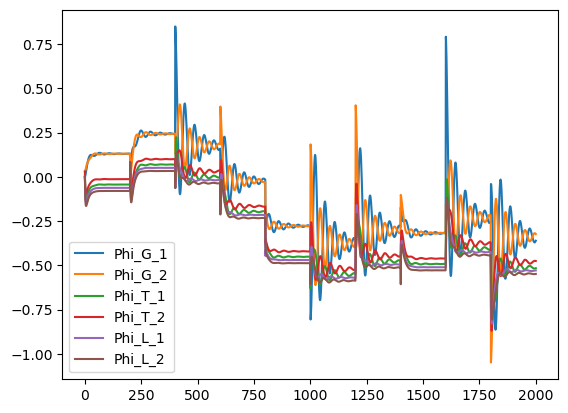

In [17]:
data_matrix_df[phase_features].plot()

In [18]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_T_1,Phi_T_2,Phi_L_1,Phi_L_2,om_G_1,om_G_2,om_T_1,om_T_2,om_L_1,om_L_2,P_G_1,P_G_2,P_T_1,P_T_2,P_L_1,P_L_2
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,-15.87535473,-6.58113387,-11.47271205,-0.00000000,-0.00000000,-0.00000000,1.30553432,-0.82715001,-0.47838430
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,-5.46518256,-5.83873397,0.56095147,1.47360231,0.25887909,-0.09266137,-0.97515765,-1.22561386
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,-3.00515162,-3.24914607,0.97655598,2.16680957,0.00431959,-0.27718714,-1.30142939,-1.56906862
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,-1.52473992,-1.67005372,1.23405535,2.58075647,-0.15474827,-0.38378622,-1.49777509,-1.77850225
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,-0.63517643,-0.71708550,1.39417084,2.82415143,-0.25006607,-0.44760550,-1.61575711,-1.90489358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,19.95910000,-0.36995021,-0.31878223,-0.51811109,-0.47471009,-0.52932695,-0.54959099,0.10345794,-0.03432414,0.02971064,0.00172170,0.01431607,0.01840715,1.37939395,3.11867443,-0.33099553,-0.46273280,-1.70189873,-2.00244132
1997,19.96910000,-0.36859447,-0.31932312,-0.51775268,-0.47476371,-0.52919882,-0.54939413,0.16687818,-0.07346053,0.04178066,-0.01235517,0.01127813,0.02087965,1.38861040,3.10900742,-0.33144083,-0.46191194,-1.70149581,-2.00276925
1998,19.97910000,-0.36663082,-0.32024233,-0.51727968,-0.47495493,-0.52910190,-0.54917514,0.22485195,-0.10986797,0.05259319,-0.02575334,0.00808650,0.02282883,1.40238322,3.09456320,-0.33114808,-0.46169807,-1.70107251,-2.00302777
1999,19.98910000,-0.36411914,-0.32150908,-0.51670567,-0.47527565,-0.52903738,-0.54893941,0.27631812,-0.14285816,0.06195080,-0.03821436,0.00480752,0.02422281,1.42028157,3.07579071,-0.33014513,-0.46207689,-1.70063762,-2.00321265


In [19]:
data_matrix_df.columns

Index(['time', 'Phi_G_1', 'Phi_G_2', 'Phi_T_1', 'Phi_T_2', 'Phi_L_1',
       'Phi_L_2', 'om_G_1', 'om_G_2', 'om_T_1', 'om_T_2', 'om_L_1', 'om_L_2',
       'P_G_1', 'P_G_2', 'P_T_1', 'P_T_2', 'P_L_1', 'P_L_2'],
      dtype='object')

### Splitting the time-series with respect to the perturbation points

In [20]:
#Getting perturbations time points
perturbation_points_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_timepoints.csv"))

perturbation_points_df = perturbation_points_df[perturbation_points_df["Perturbation timepoints"] <= final_time]

In [21]:
perturbation_time_point_list = perturbation_points_df["Perturbation timepoints"]
# perturbation_time_point_list

In [22]:
perturbation_time_point_list

0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
Name: Perturbation timepoints, dtype: int64

In [23]:
#Splitting the data_matrix with the timeseries into a list of timeseries dataframes based on where the perturbation is introduced
#The purpose of this step is to smoothen each of perturbation segment independently using splines and find the derivaties
#This will avoid jumps in the derivative due to the discontinuity at the perturbanc time point

data_matrix_df_list =[data_matrix_df[(ind_i < data_matrix_df["time"]) & (data_matrix_df["time"] < ind_j) ] 
                       for ind_i, ind_j in zip(perturbation_time_point_list[:-1], perturbation_time_point_list[1:])]


data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)

data_matrix_df_appended

,time,Phi_G_1,Phi_G_2,Phi_T_1,Phi_T_2,Phi_L_1,Phi_L_2,om_G_1,om_G_2,om_T_1,om_T_2,om_L_1,om_L_2,P_G_1,P_G_2,P_T_1,P_T_2,P_L_1,P_L_2
0,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,-5.46518256,-5.83873397,0.56095147,1.47360231,0.25887909,-0.09266137,-0.97515765,-1.22561386
1,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,-3.00515162,-3.24914607,0.97655598,2.16680957,0.00431959,-0.27718714,-1.30142939,-1.56906862
2,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,-1.52473992,-1.67005372,1.23405535,2.58075647,-0.15474827,-0.38378622,-1.49777509,-1.77850225
3,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,-0.63517643,-0.71708550,1.39417084,2.82415143,-0.25006607,-0.44760550,-1.61575711,-1.90489358
4,0.05000000,0.02963554,0.05279594,-0.13103353,-0.09524411,-0.14631543,-0.16482052,0.81381242,0.54827279,-0.04984337,0.04411545,-0.10817361,-0.15032623,1.49488220,2.96209772,-0.30596472,-0.48529980,-1.68565303,-1.98006236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,19.95910000,-0.36995021,-0.31878223,-0.51811109,-0.47471009,-0.52932695,-0.54959099,0.10345794,-0.03432414,0.02971064,0.00172170,0.01431607,0.01840715,1.37939395,3.11867443,-0.33099553,-0.46273280,-1.70189873,-2.00244132
1995,19.96910000,-0.36859447,-0.31932312,-0.51775268,-0.47476371,-0.52919882,-0.54939413,0.16687818,-0.07346053,0.04178066,-0.01235517,0.01127813,0.02087965,1.38861040,3.10900742,-0.33144083,-0.46191194,-1.70149581,-2.00276925
1996,19.97910000,-0.36663082,-0.32024233,-0.51727968,-0.47495493,-0.52910190,-0.54917514,0.22485195,-0.10986797,0.05259319,-0.02575334,0.00808650,0.02282883,1.40238322,3.09456320,-0.33114808,-0.46169807,-1.70107251,-2.00302777
1997,19.98910000,-0.36411914,-0.32150908,-0.51670567,-0.47527565,-0.52903738,-0.54893941,0.27631812,-0.14285816,0.06195080,-0.03821436,0.00480752,0.02422281,1.42028157,3.07579071,-0.33014513,-0.46207689,-1.70063762,-2.00321265


#### Loading admittance matrix, Y

In [24]:
admittance_Y_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_Y.csv"))
for column in admittance_Y_df.columns:
    admittance_Y_df[column] = admittance_Y_df[column].apply(lambda x: x.replace('i', 'j'))

In [25]:
admittance_Y_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,0-9.3443j,0,-0+9.3443j,0,0,0
1,0,0-19.302j,0,-0+19.302j,0,0
2,-0+9.3443j,0,0-55.977j,0,0+19.841j,0+26.882j
3,0,-0+19.302j,0,0-61.805j,0+26.882j,0+15.723j
4,0,0,0+19.841j,0+26.882j,0-46.633j,0
5,0,0,0+26.882j,0+15.723j,0,0-42.502j


#### Loading static parameters

In [26]:
static_param_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_staticparams.csv"))

In [27]:
static_param_df

,V,A,omega_R,D,H
0,1.00000000,1.82000000,376.99111843,50,7.28000000
1,1.02000000,3.18000000,376.99111843,50,12.72000000
2,1.00000000,-0.50000000,376.99111843,50,0.00000000
3,1.02000000,-0.80000000,376.99111843,50,0.00000000
4,0.98985198,-1.70000000,376.99111843,50,0.00000000
5,0.97876194,-2.00000000,376.99111843,50,0.00000000


#### Loading coupling matrix, K

In [28]:
coupling_K_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_K.csv"))

In [29]:
coupling_K_df_labeled = coupling_K_df.set_index(coupling_K_df.columns)
coupling_K_df_labeled

,gen_1,gen_2,term_1,term_2,load_1,load_2
gen_1,0.00000000,0.00000000,10.51600000,0.00000000,0.00000000,0.00000000
gen_2,0.00000000,0.00000000,0.00000000,22.25500000,0.00000000,0.00000000
term_1,10.51600000,0.00000000,0.00000000,0.00000000,19.64000000,26.31100000
term_2,0.00000000,22.25500000,0.00000000,0.00000000,27.14100000,15.69700000
load_1,0.00000000,0.00000000,19.64000000,27.14100000,0.00000000,0.00000000
load_2,0.00000000,0.00000000,26.31100000,15.69700000,0.00000000,0.00000000


In [30]:
coupling_matrix_true = coupling_K_df .to_numpy()
coupling_matrix_true

array([[ 0.   ,  0.   , 10.516,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , 22.255,  0.   ,  0.   ],
       [10.516,  0.   ,  0.   ,  0.   , 19.64 , 26.311],
       [ 0.   , 22.255,  0.   ,  0.   , 27.141, 15.697],
       [ 0.   ,  0.   , 19.64 , 27.141,  0.   ,  0.   ],
       [ 0.   ,  0.   , 26.311, 15.697,  0.   ,  0.   ]])

## Forming candidate library for powersystems

In [31]:
gamma_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000


In [32]:
gamma_matrix = gamma_df.to_numpy()
admittance_Y_matrix = admittance_Y_df.to_numpy()

gamma_matrix

array([[-3.1416,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -3.1416,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -3.1416,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , -3.1416,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -3.1416,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -3.1416]])

In [33]:
coupling_matrix_init = np.ones(admittance_Y_matrix.shape)
# coupling_matrix_init = np.zeros(admittance_Y_matrix.shape)
# coupling_matrix_init[3,:] = 1

coupling_matrix_init = np.triu(coupling_matrix_init, 0)
coupling_matrix_init
sparse_coupling_matrix_init = coo_array(coupling_matrix_init)
sparse_coupling_matrix_init.toarray()

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Defining the sin interaction terms 

In [34]:
from dae_finder import FeatureCouplingTransformer

def coup_fun_sin_diff(x,y,i,j,gam_matrix):
    return np.sin(x-y- gam_matrix[i,j])

def coup_namer_sin_diff(x,y,i,j,gam_matrix=None):
    return "sin( {}-{} -gamma_{},{} )".format(x,y,i,j)


# def coup_fun_diff(x,y,i,j,gam_matrix):
#     return x-y- gam_matrix[i,j]

# def coup_namer_diff(x,y,i,j,gam_matrix):
#     return "{}-{} -gamma_{},{}".format(x,y,i,j)

transfomrer_sin_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_sin_diff,
                                           coupling_namer= coup_namer_sin_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

# transformer_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
#                                            coupling_func= coup_fun_diff,
#                                            coupling_namer= coup_namer_diff,
#                                            coupling_func_args={"gam_matrix":gamma_matrix},
#                                               return_df=True)

In [35]:
#Creating library with sin(load angle difference)
sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df_appended.drop(["time"], axis=1))
# sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))

cop_ind = transfomrer_sin_diff.coupled_indices_list

# #Creating library with load angle difference
# diff_library = transformer_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))


In [36]:
sin_diff_library

,"sin( Phi_G_1-Phi_G_1 -gamma_0,0 )","sin( Phi_G_1-Phi_G_2 -gamma_0,1 )","sin( Phi_G_1-Phi_T_1 -gamma_0,2 )","sin( Phi_G_1-Phi_T_2 -gamma_0,3 )","sin( Phi_G_1-Phi_L_1 -gamma_0,4 )","sin( Phi_G_1-Phi_L_2 -gamma_0,5 )","sin( Phi_G_2-Phi_G_2 -gamma_1,1 )","sin( Phi_G_2-Phi_T_1 -gamma_1,2 )","sin( Phi_G_2-Phi_T_2 -gamma_1,3 )","sin( Phi_G_2-Phi_L_1 -gamma_1,4 )",...,"sin( Phi_T_1-Phi_T_1 -gamma_2,2 )","sin( Phi_T_1-Phi_T_2 -gamma_2,3 )","sin( Phi_T_1-Phi_L_1 -gamma_2,4 )","sin( Phi_T_1-Phi_L_2 -gamma_2,5 )","sin( Phi_T_2-Phi_T_2 -gamma_3,3 )","sin( Phi_T_2-Phi_L_1 -gamma_3,4 )","sin( Phi_T_2-Phi_L_2 -gamma_3,5 )","sin( Phi_L_1-Phi_L_1 -gamma_4,4 )","sin( Phi_L_1-Phi_L_2 -gamma_4,5 )","sin( Phi_L_2-Phi_L_2 -gamma_5,5 )"
0,-0.00000735,-0.03020705,0.06003168,0.04322005,0.07108834,0.08286313,-0.00000735,0.09015685,0.07337915,0.10118652,...,-0.00000735,-0.01683348,0.01108033,0.02288846,-0.00000735,0.02791120,0.03971428,-0.00000735,0.01180963,-0.00000735
1,-0.00000735,-0.02924873,0.10450867,0.07877380,0.11726059,0.13201955,-0.00000735,0.13355252,0.10789793,0.14625736,...,-0.00000735,-0.02584148,0.01283078,0.02770269,-0.00000735,0.03866585,0.05352500,-0.00000735,0.01487455,-0.00000735
2,-0.00000735,-0.02769033,0.13206563,0.10100073,0.14580929,0.16239710,-0.00000735,0.15946278,0.12851073,0.17314777,...,-0.00000735,-0.03127423,0.01387793,0.03066214,-0.00000735,0.04514236,0.06190667,-0.00000735,0.01678778,-0.00000735
3,-0.00000735,-0.02563181,0.14920081,0.11520748,0.16367286,0.18130451,-0.00000735,0.17449670,0.14063077,0.18890524,...,-0.00000735,-0.03428939,0.01465208,0.03254705,-0.00000735,0.04892917,0.06679914,-0.00000735,0.01789925,-0.00000735
4,-0.00000735,-0.02315833,0.15997869,0.12455533,0.17504450,0.19323287,-0.00000735,0.18279585,0.14749991,0.19779834,...,-0.00000735,-0.03578177,0.01528131,0.03378056,-0.00000735,0.05104912,0.06952028,-0.00000735,0.01850403,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.00000735,-0.05114565,0.14761942,0.10456837,0.15870287,0.17867615,-0.00000735,0.19801153,0.15529677,0.20899262,...,-0.00000735,-0.04338738,0.01121562,0.03147470,-0.00000735,0.05458971,0.07481094,-0.00000735,0.02026266,-0.00000735
1995,-0.00000735,-0.04925142,0.14860574,0.10596989,0.15991481,0.17981626,-0.00000735,0.19712995,0.15481539,0.20833833,...,-0.00000735,-0.04297573,0.01144589,0.03163617,-0.00000735,0.05440823,0.07456117,-0.00000735,0.02019394,-0.00000735
1996,-0.00000735,-0.04637185,0.15007967,0.10811239,0.16175724,0.18153221,-0.00000735,0.19576486,0.15409613,0.20734438,...,-0.00000735,-0.04231211,0.01182195,0.03189006,-0.00000735,0.05412051,0.07415209,-0.00000735,0.02007190,-0.00000735
1997,-0.00000735,-0.04259718,0.15199511,0.11092774,0.16417168,0.18376986,-0.00000735,0.19395940,0.15316134,0.20604187,...,-0.00000735,-0.04141817,0.01233140,0.03222816,-0.00000735,0.05373584,0.07359716,-0.00000735,0.01990072,-0.00000735


In [37]:
# candidate_lib = pd.concat([data_matrix_df.drop("time", axis=1), sin_diff_library], axis=1)

candidate_lib = pd.concat([data_matrix_df_appended.drop("time", axis=1), sin_diff_library], axis=1)

In [38]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_T_1,Phi_T_2,Phi_L_1,Phi_L_2,om_G_1,om_G_2,om_T_1,om_T_2,...,"sin( Phi_T_1-Phi_T_1 -gamma_2,2 )","sin( Phi_T_1-Phi_T_2 -gamma_2,3 )","sin( Phi_T_1-Phi_L_1 -gamma_2,4 )","sin( Phi_T_1-Phi_L_2 -gamma_2,5 )","sin( Phi_T_2-Phi_T_2 -gamma_3,3 )","sin( Phi_T_2-Phi_L_1 -gamma_3,4 )","sin( Phi_T_2-Phi_L_2 -gamma_3,5 )","sin( Phi_L_1-Phi_L_1 -gamma_4,4 )","sin( Phi_L_1-Phi_L_2 -gamma_4,5 )","sin( Phi_L_2-Phi_L_2 -gamma_5,5 )"
0,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,...,-0.00000735,-0.01683348,0.01108033,0.02288846,-0.00000735,0.02791120,0.03971428,-0.00000735,0.01180963,-0.00000735
1,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,...,-0.00000735,-0.02584148,0.01283078,0.02770269,-0.00000735,0.03866585,0.05352500,-0.00000735,0.01487455,-0.00000735
2,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,...,-0.00000735,-0.03127423,0.01387793,0.03066214,-0.00000735,0.04514236,0.06190667,-0.00000735,0.01678778,-0.00000735
3,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,...,-0.00000735,-0.03428939,0.01465208,0.03254705,-0.00000735,0.04892917,0.06679914,-0.00000735,0.01789925,-0.00000735
4,0.02963554,0.05279594,-0.13103353,-0.09524411,-0.14631543,-0.16482052,0.81381242,0.54827279,-0.04984337,0.04411545,...,-0.00000735,-0.03578177,0.01528131,0.03378056,-0.00000735,0.05104912,0.06952028,-0.00000735,0.01850403,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.36995021,-0.31878223,-0.51811109,-0.47471009,-0.52932695,-0.54959099,0.10345794,-0.03432414,0.02971064,0.00172170,...,-0.00000735,-0.04338738,0.01121562,0.03147470,-0.00000735,0.05458971,0.07481094,-0.00000735,0.02026266,-0.00000735
1995,-0.36859447,-0.31932312,-0.51775268,-0.47476371,-0.52919882,-0.54939413,0.16687818,-0.07346053,0.04178066,-0.01235517,...,-0.00000735,-0.04297573,0.01144589,0.03163617,-0.00000735,0.05440823,0.07456117,-0.00000735,0.02019394,-0.00000735
1996,-0.36663082,-0.32024233,-0.51727968,-0.47495493,-0.52910190,-0.54917514,0.22485195,-0.10986797,0.05259319,-0.02575334,...,-0.00000735,-0.04231211,0.01182195,0.03189006,-0.00000735,0.05412051,0.07415209,-0.00000735,0.02007190,-0.00000735
1997,-0.36411914,-0.32150908,-0.51670567,-0.47527565,-0.52903738,-0.54893941,0.27631812,-0.14285816,0.06195080,-0.03821436,...,-0.00000735,-0.04141817,0.01233140,0.03222816,-0.00000735,0.05373584,0.07359716,-0.00000735,0.01990072,-0.00000735


### Removing zero features

In [39]:
non_zero_column_series = (candidate_lib**2).sum() > 0.00001
non_zero_column_series
non_columns = [column for column in candidate_lib if non_zero_column_series[column]]

candidate_lib = candidate_lib[non_columns]

## Smoothening data and finding derivatives using splines

In [40]:
from dae_finder import add_noise_to_df

noise_perc = 0
# data_matrix_df_list = [data_matrix_df]
num_time_points = len(data_matrix_df_list[0])
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["time"]
    noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noisy_data_df["time"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [41]:
from dae_finder import smooth_data

# Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix, domain_var="time", derr_order=1, noise_perc=noise_perc) for
                              data_matrix in data_matrix_df_list]

if len(data_matrix_df_list) > 1:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)
else:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0]

data_matrix_df_smooth = data_matrix_df_smooth_appended[data_matrix_features]
# if "time" in data_matrix_df_smooth:
#     data_matrix_df_smooth = data_matrix_df_smooth.drop("time", axis=1)

In [42]:
(data_matrix_df_smooth - data_matrix_df_appended).sum()

time      -0.00000000
Phi_G_1   -0.00000000
Phi_G_2    0.00000000
Phi_T_1   -0.00000000
Phi_T_2    0.00000000
Phi_L_1   -0.00000000
Phi_L_2   -0.00000000
om_G_1    -0.00000000
om_G_2     0.00000000
om_T_1     0.00000000
om_T_2     0.00000000
om_L_1     0.00000000
om_L_2     0.00000000
P_G_1      0.00000000
P_G_2      0.00000000
P_T_1     -0.00000000
P_T_2     -0.00000000
P_L_1     -0.00000000
P_L_2     -0.00000000
dtype: float64

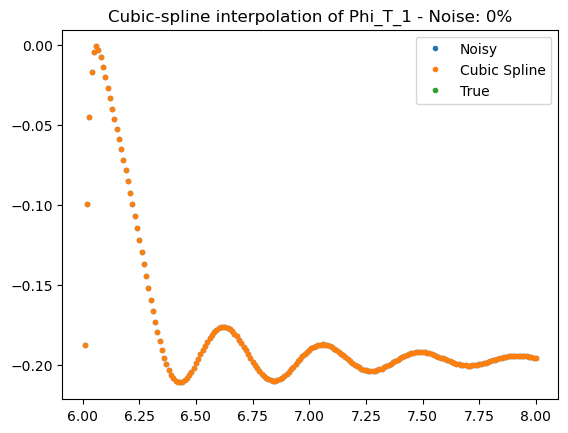

In [43]:
ind = 3
feature_ = "Phi_T_1"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["time"], data_matrix_df_list[ind][feature_], ".",
         data_matrix_smooth_df_list[ind]["time"],
         data_matrix_smooth_df_list[ind][feature_], ".",
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points]["time"],
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points][feature_], ".")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

## Finding Algebraic relationship

### Using sympy to find factors of redundant feature and refine the library

In [44]:
import sympy

from dae_finder import get_refined_lib, remove_paranth_from_feat

# Adding the state variables as scipy symbols
feat_list = list(data_matrix_df_appended.columns)
feat_list_str = ", ".join(remove_paranth_from_feat(data_matrix_df_appended.columns))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")

In [45]:
data_matrix_df_smooth_appended.columns

Index(['time', 'Phi_G_1', 'd(Phi_G_1) /dt', 'Phi_G_2', 'd(Phi_G_2) /dt',
       'Phi_T_1', 'd(Phi_T_1) /dt', 'Phi_T_2', 'd(Phi_T_2) /dt', 'Phi_L_1',
       'd(Phi_L_1) /dt', 'Phi_L_2', 'd(Phi_L_2) /dt', 'om_G_1',
       'd(om_G_1) /dt', 'om_G_2', 'd(om_G_2) /dt', 'om_T_1', 'd(om_T_1) /dt',
       'om_T_2', 'd(om_T_2) /dt', 'om_L_1', 'd(om_L_1) /dt', 'om_L_2',
       'd(om_L_2) /dt', 'P_G_1', 'd(P_G_1) /dt', 'P_G_2', 'd(P_G_2) /dt',
       'P_T_1', 'd(P_T_1) /dt', 'P_T_2', 'd(P_T_2) /dt', 'P_L_1',
       'd(P_L_1) /dt', 'P_L_2', 'd(P_L_2) /dt'],
      dtype='object')

In [46]:
data_matrix_features

Index(['time', 'Phi_G_1', 'Phi_G_2', 'Phi_T_1', 'Phi_T_2', 'Phi_L_1',
       'Phi_L_2', 'om_G_1', 'om_G_2', 'om_T_1', 'om_T_2', 'om_L_1', 'om_L_2',
       'P_G_1', 'P_G_2', 'P_T_1', 'P_T_2', 'P_L_1', 'P_L_2'],
      dtype='object')

In [47]:
feature_list = list(data_matrix_features)
feature_list.remove('time')

feature_list

['Phi_G_1',
 'Phi_G_2',
 'Phi_T_1',
 'Phi_T_2',
 'Phi_L_1',
 'Phi_L_2',
 'om_G_1',
 'om_G_2',
 'om_T_1',
 'om_T_2',
 'om_L_1',
 'om_L_2',
 'P_G_1',
 'P_G_2',
 'P_T_1',
 'P_T_2',
 'P_L_1',
 'P_L_2']

In [48]:
refined_candid_lib = data_matrix_df_smooth_appended[feature_list]

In [49]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_refined_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(candidate_lib), columns=s_scaler.feature_names_in_)

In [50]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_T_1,Phi_T_2,Phi_L_1,Phi_L_2,om_G_1,om_G_2,om_T_1,om_T_2,...,"sin( Phi_G_2-Phi_T_1 -gamma_1,2 )","sin( Phi_G_2-Phi_T_2 -gamma_1,3 )","sin( Phi_G_2-Phi_L_1 -gamma_1,4 )","sin( Phi_G_2-Phi_L_2 -gamma_1,5 )","sin( Phi_T_1-Phi_T_2 -gamma_2,3 )","sin( Phi_T_1-Phi_L_1 -gamma_2,4 )","sin( Phi_T_1-Phi_L_2 -gamma_2,5 )","sin( Phi_T_2-Phi_L_1 -gamma_3,4 )","sin( Phi_T_2-Phi_L_2 -gamma_3,5 )","sin( Phi_L_1-Phi_L_2 -gamma_4,5 )"
0,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,...,0.09015685,0.07337915,0.10118652,0.11292848,-0.01683348,0.01108033,0.02288846,0.02791120,0.03971428,0.01180963
1,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,...,0.13355252,0.10789793,0.14625736,0.16095578,-0.02584148,0.01283078,0.02770269,0.03866585,0.05352500,0.01487455
2,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,...,0.15946278,0.12851073,0.17314777,0.18965759,-0.03127423,0.01387793,0.03066214,0.04514236,0.06190667,0.01678778
3,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,...,0.17449670,0.14063077,0.18890524,0.20645196,-0.03428939,0.01465208,0.03254705,0.04892917,0.06679914,0.01789925
4,0.02963554,0.05279594,-0.13103353,-0.09524411,-0.14631543,-0.16482052,0.81381242,0.54827279,-0.04984337,0.04411545,...,0.18279585,0.14749991,0.19779834,0.21590291,-0.03578177,0.01528131,0.03378056,0.05104912,0.06952028,0.01850403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.36995021,-0.31878223,-0.51811109,-0.47471009,-0.52932695,-0.54959099,0.10345794,-0.03432414,0.02971064,0.00172170,...,0.19801153,0.15529677,0.20899262,0.22876491,-0.04338738,0.01121562,0.03147470,0.05458971,0.07481094,0.02026266
1995,-0.36859447,-0.31932312,-0.51775268,-0.47476371,-0.52919882,-0.54939413,0.16687818,-0.07346053,0.04178066,-0.01235517,...,0.19712995,0.15481539,0.20833833,0.22804667,-0.04297573,0.01144589,0.03163617,0.05440823,0.07456117,0.02019394
1996,-0.36663082,-0.32024233,-0.51727968,-0.47495493,-0.52910190,-0.54917514,0.22485195,-0.10986797,0.05259319,-0.02575334,...,0.19576486,0.15409613,0.20734438,0.22693830,-0.04231211,0.01182195,0.03189006,0.05412051,0.07415209,0.02007190
1997,-0.36411914,-0.32150908,-0.51670567,-0.47527565,-0.52903738,-0.54893941,0.27631812,-0.14285816,0.06195080,-0.03821436,...,0.19395940,0.15316134,0.20604187,0.22547478,-0.04141817,0.01233140,0.03222816,0.05373584,0.07359716,0.01990072


# Using Lasso

## Finding the conservation laws

In [51]:
from dae_finder import sequentialThLin, AlgModelFinder
algebraic_model_lasso = AlgModelFinder(model_id='lasso',
                                       alpha=0.3,
                                       fit_intercept=True)

In [67]:
power_features = [feature for feature in feature_list if "P_" in feature]
freq_features = [feature for feature in feature_list if "om_" in feature]
phase_features = [feature for feature in feature_list if "Phi_" in feature]

# features_to_fit_ = [feature for feature in feature_list if ("Phi_" in feature or "P_" in feature)]
power_features

['P_G_1', 'P_G_2', 'P_T_1', 'P_T_2', 'P_L_1', 'P_L_2']

In [53]:
# features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                     "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# num_nodes = 6
# power_features = ["P_{}".format(ind) for ind in range(num_nodes)]

# Mapping each power feature to possible expressions in the algebraic relationship. This is done by taking the power features and frequency
# feature from the candidate library
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

algebraic_model_lasso.fit(candidate_lib, scale_columns=True,
                          features_to_fit=power_features,
                          feature_to_library_map=feature_to_libr_map)


AlgModelFinder(alpha=0.3, fit_intercept=True)

In [62]:
algebraic_model_lasso.best_models()

,P_G_2,P_G_1,P_T_1,P_T_2,P_L_2,P_L_1
Phi_G_1,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000
Phi_G_2,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
Phi_T_1,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000
Phi_T_2,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
Phi_L_1,0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000
Phi_L_2,-0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000
"sin( Phi_G_1-Phi_T_1 -gamma_0,2 )",-0.00000000,6.54098071,0.00000000,-0.70303954,-0.00000000,-0.00000000
"sin( Phi_G_1-Phi_T_2 -gamma_0,3 )",-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000
"sin( Phi_G_1-Phi_L_1 -gamma_0,4 )",-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000


In [63]:
for feat in power_features:
    print(feat)
    print(algebraic_model_lasso.best_models()[feat][abs(algebraic_model_lasso.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,2 )   6.54098071
r2- metric                          0.91000000
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,3 )   14.05742138
r2- metric                           0.91000000
Name: P_G_2, dtype: float64
P_T_1
sin( Phi_G_2-Phi_T_2 -gamma_1,3 )   -1.83658160
sin( Phi_L_1-Phi_L_2 -gamma_4,5 )   -1.69697130
r2- metric                           0.68465832
Name: P_T_1, dtype: float64
P_T_2
sin( Phi_G_1-Phi_T_1 -gamma_0,2 )   -0.70303954
r2- metric                           0.50323872
Name: P_T_2, dtype: float64
P_L_1
sin( Phi_G_2-Phi_T_2 -gamma_1,3 )   -0.28306263
Name: P_L_1, dtype: float64
P_L_2
sin( Phi_L_1-Phi_L_2 -gamma_4,5 )   -2.44167091
r2- metric                           0.10530432
Name: P_L_2, dtype: float64


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

In [64]:
from sklearn.linear_model import Lasso

alg_lasso = Lasso(fit_intercept=True, alpha=0.3)
alg_lasso.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.993372962219676

In [66]:
coef_dict = dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))
coef_dict

{'Phi_0': -0.0,
 'Phi_1': 0.0,
 'Phi_2': -0.0,
 'Phi_3': -0.0,
 'Phi_4': -0.0,
 'Phi_5': -0.0,
 'om_0': -4.378569736500431,
 'om_1': 0.0,
 'P_0': -21.257906402869075,
 'P_1': 0.0,
 'P_2': -0.6586577243676952,
 'P_3': -0.0,
 'P_4': 0.0,
 'P_5': 0.0}

In [67]:
seq_th_model.intercept_

43.934898759814715

In [68]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

['om_0', 'P_0', 'P_2']

In [69]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.9941958733407162

In [70]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'om_0': -4.794440359929478,
 'P_0': -21.691899870238316,
 'P_2': -1.032076931283162}

### Full candidate library is unable to find the model 

In [42]:
alg_lasso.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.9942246455235572

In [43]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

{'Phi_0': -0.0,
 'Phi_1': 0.0,
 'Phi_2': -0.0,
 'Phi_3': -0.0,
 'Phi_4': -0.0,
 'Phi_5': -0.0,
 'om_0': -4.42511229895725,
 'om_1': 0.0,
 'P_0': -16.11820529841526,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': -0.0,
 'P_4': 0.0,
 'P_5': -0.0,
 'sin( Phi_0-Phi_1 -gamma_0,1 )': -0.0,
 'sin( Phi_0-Phi_2 -gamma_0,2 )': -0.07085153655901995,
 'sin( Phi_0-Phi_3 -gamma_0,3 )': -0.0,
 'sin( Phi_0-Phi_4 -gamma_0,4 )': -1.8898225265120703,
 'sin( Phi_0-Phi_5 -gamma_0,5 )': -3.234378209313293,
 'sin( Phi_1-Phi_2 -gamma_1,2 )': 0.0,
 'sin( Phi_1-Phi_3 -gamma_1,3 )': 0.0,
 'sin( Phi_1-Phi_4 -gamma_1,4 )': 0.0,
 'sin( Phi_1-Phi_5 -gamma_1,5 )': 0.0,
 'sin( Phi_2-Phi_3 -gamma_2,3 )': -0.0,
 'sin( Phi_2-Phi_4 -gamma_2,4 )': -0.0,
 'sin( Phi_2-Phi_5 -gamma_2,5 )': -0.0,
 'sin( Phi_3-Phi_4 -gamma_3,4 )': 0.0,
 'sin( Phi_3-Phi_5 -gamma_3,5 )': 0.0,
 'sin( Phi_4-Phi_5 -gamma_4,5 )': 0.0}

# Using Sequential Thresholding

## Finding the conservation laws

In [69]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression
lin_reg_model_arg = {"fit_intercept": True}
seq_th_model = sequentialThLin(custom_model=True,
                               custom_model_ob = lin_reg_model,
                               custom_model_arg= lin_reg_model_arg,
                              coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.1, fit_intercept=True)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

In [70]:
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

algebraic_model_th.fit(candidate_lib, scale_columns=False,
                       features_to_fit=power_features,
                       feature_to_library_map=feature_to_libr_map)


Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations


AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x12fa94140>)

In [71]:
freq_features

['om_G_1', 'om_G_2', 'om_T_1', 'om_T_2', 'om_L_1', 'om_L_2']

In [72]:
#Best 10 models using R2 metrix
algebraic_model_th.best_models()

,P_G_1,P_G_2,P_T_1,P_T_2,P_L_1,P_L_2
Phi_G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_T_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_T_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_L_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_L_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_T_1 -gamma_0,2 )",9.34425815,0.00000000,-9.34425815,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_T_2 -gamma_0,3 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_L_1 -gamma_0,4 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [73]:
algebraic_model_th.get_fitted_intercepts()

{'P_G_1': -1.1102230246251565e-15,
 'P_G_2': -2.6645352591003757e-15,
 'P_T_1': -3.3306690738754696e-15,
 'P_T_2': -6.050715484207103e-15,
 'P_L_1': -7.993605777301127e-15,
 'P_L_2': -7.549516567451064e-15}

In [74]:
for feat in power_features:
    print(feat)
    print(algebraic_model_th.best_models()[feat][abs(algebraic_model_th.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,2 )   9.34425815
r2- metric                          1.00000000
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,3 )   20.08203054
r2- metric                           1.00000000
Name: P_G_2, dtype: float64
P_T_1
sin( Phi_G_1-Phi_T_1 -gamma_0,2 )   -9.34425815
sin( Phi_T_1-Phi_L_1 -gamma_2,4 )   19.63992022
sin( Phi_T_1-Phi_L_2 -gamma_2,5 )   26.31080491
r2- metric                           1.00000000
Name: P_T_1, dtype: float64
P_T_2
sin( Phi_G_2-Phi_T_2 -gamma_1,3 )   -20.08203054
sin( Phi_T_2-Phi_L_1 -gamma_3,4 )    27.14110265
sin( Phi_T_2-Phi_L_2 -gamma_3,5 )    15.69712549
r2- metric                            1.00000000
Name: P_T_2, dtype: float64
P_L_1
sin( Phi_T_1-Phi_L_1 -gamma_2,4 )   -19.63992022
sin( Phi_T_2-Phi_L_1 -gamma_3,4 )   -27.14110265
r2- metric                            1.00000000
Name: P_L_1, dtype: float64
P_L_2
sin( Phi_T_1-Phi_L_2 -gamma_2,5 )   -26.31080491
sin( Phi_T_2-Phi_L_2 -gamma_3,5 )   -15.69712549
r

### Checking model accuracy

### Extracting true models from the true coupling matrix

In [79]:
fitted_models = algebraic_model_th.best_models()[:-1]

In [80]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.1:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_26209/581240014.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [81]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [83]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

,P_G_1,P_G_2,P_T_1,P_T_2,P_L_1,P_L_2
Phi_G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_T_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_T_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_L_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_L_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_T_1 -gamma_0,2 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_T_2 -gamma_0,3 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_G_1-Phi_L_1 -gamma_0,4 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

<Axes: >

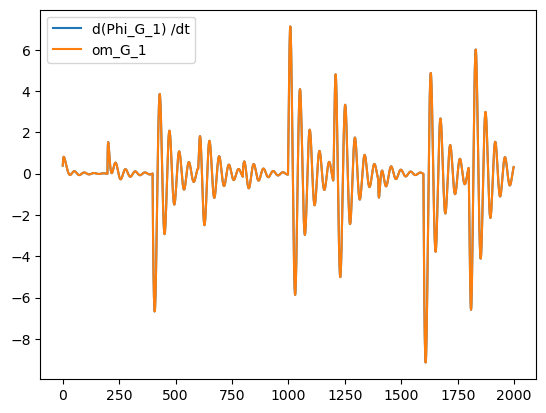

In [88]:
data_matrix_df_smooth_appended[['d(Phi_G_1) /dt', 'om_G_1']].plot()

In [ ]:
ind = "G_1"
data_matrix_df_smooth_appended[['d(Phi_{}) /dt', 'om_G_1']].plot()


In [84]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)
seq_th_model = sequentialThLin(model_id="lasso", coef_threshold=0.1, fit_intercept=True)

seq_th_model.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_G) /dt'])
seq_th_model.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

KeyError: 'd(om_0) /dt'

In [57]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

{'Phi_0': 0.0,
 'Phi_1': 0.0,
 'Phi_2': 0.0,
 'Phi_3': 0.0,
 'Phi_4': 0.0,
 'Phi_5': 0.0,
 'om_0': -3.4265790184989955,
 'om_1': 0.0,
 'P_0': -20.273842484145458,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': 0.0,
 'P_4': 0.0,
 'P_5': 0.0}

In [58]:
seq_th_model.intercept_

43.67131166721149

In [59]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

['om_0', 'P_0']

In [60]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.991855949164572

In [61]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'om_0': -4.706282780743189, 'P_0': -21.55353230528021}

### Full candidate library is unable to find the model 

In [62]:
seq_th_model.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
seq_th_model.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

Sequential threshold converged in 2 iterations


0.988885520759928

In [63]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))

{'Phi_0': 0.0,
 'Phi_1': 0.0,
 'Phi_2': 0.0,
 'Phi_3': 0.0,
 'Phi_4': 0.0,
 'Phi_5': 0.0,
 'om_0': -3.513639923413333,
 'om_1': 0.0,
 'P_0': -16.19834499489593,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': 0.0,
 'P_4': 0.0,
 'P_5': 0.0,
 'sin( Phi_0-Phi_1 -gamma_0,1 )': 0.0,
 'sin( Phi_0-Phi_2 -gamma_0,2 )': 0.0,
 'sin( Phi_0-Phi_3 -gamma_0,3 )': 0.0,
 'sin( Phi_0-Phi_4 -gamma_0,4 )': -1.3982756870160125,
 'sin( Phi_0-Phi_5 -gamma_0,5 )': -2.7962471849994524,
 'sin( Phi_1-Phi_2 -gamma_1,2 )': 0.0,
 'sin( Phi_1-Phi_3 -gamma_1,3 )': 0.0,
 'sin( Phi_1-Phi_4 -gamma_1,4 )': 0.0,
 'sin( Phi_1-Phi_5 -gamma_1,5 )': 0.0,
 'sin( Phi_2-Phi_3 -gamma_2,3 )': 0.0,
 'sin( Phi_2-Phi_4 -gamma_2,4 )': 0.0,
 'sin( Phi_2-Phi_5 -gamma_2,5 )': 0.0,
 'sin( Phi_3-Phi_4 -gamma_3,4 )': 0.0,
 'sin( Phi_3-Phi_5 -gamma_3,5 )': 0.0,
 'sin( Phi_4-Phi_5 -gamma_4,5 )': 0.0}